# STARBUCKS_FOOD_ANALYSIS


***Today we are trying the analyse the nutrition content of Starbucks menu and find out 10 Food Items that should be best avoided for a healthier choice of diet and suggest 10 choices that are comparatively healthier option.***

In [16]:
# importing requried libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
data2 = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding= 'unicode_escape')

In [18]:
data2.head()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Chonga Bagel,300,5.0,50,3,12
1,8-Grain Roll,380,6.0,70,7,10
2,Almond Croissant,410,22.0,45,3,10
3,Apple Fritter,460,23.0,56,2,7
4,Banana Nut Bread,420,22.0,52,2,6


In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Item          113 non-null    object 
 1   Calories      113 non-null    int64  
 2    Fat (g)      113 non-null    float64
 3    Carb. (g)    113 non-null    int64  
 4    Fiber (g)    113 non-null    int64  
 5    Protein (g)  113 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.4+ KB


In [20]:
data2.shape

(113, 6)

In [21]:
data2.isnull().sum()

Item            0
Calories        0
 Fat (g)        0
 Carb. (g)      0
 Fiber (g)      0
 Protein (g)    0
dtype: int64

# DATA CLEANING

In [22]:
data2.tail()

,Item,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
108,Justin's Chocolate Hazelnut Butter,180,14.0,12,3,4
109,Justin's Classic Almond Butter,190,18.0,6,3,7
110,Lemon Chiffon Yogurt,340,13.0,38,0,18
111,Organic Avocado (Spread),90,8.0,5,4,1
112,Seasonal Fruit Blend,90,0.0,24,4,1


In [23]:
data2.columns

Index(['Item', 'Calories', ' Fat (g)', ' Carb. (g)', ' Fiber (g)',
       ' Protein (g)'],
      dtype='object')

In [24]:
data2 = data2.rename(columns={data2.columns[2]: 'Fat'})
data2 = data2.rename(columns={data2.columns[3]: 'Carb'})
data2 = data2.rename(columns={data2.columns[4]: 'Fiber'})
data2 = data2.rename(columns={data2.columns[5]: 'Protein'})

print(data2.columns)

Index(['Item', 'Calories', 'Fat', 'Carb', 'Fiber', 'Protein'], dtype='object')


# EDA & VISUALISATION

In [25]:
data2.describe()

,Calories,Fat,Carb,Fiber,Protein
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,356.637168,16.353982,41.486726,2.849558,11.469027
std,127.710685,8.297397,15.796764,2.888466,8.463230
min,90.000000,0.000000,5.000000,0.000000,1.000000
25%,280.000000,9.000000,31.000000,1.000000,5.000000
50%,360.000000,17.000000,42.000000,2.000000,8.000000
75%,450.000000,23.000000,53.000000,3.000000,19.000000
max,650.000000,37.000000,80.000000,21.000000,34.000000


### 1.Nutrient quantity Analysis

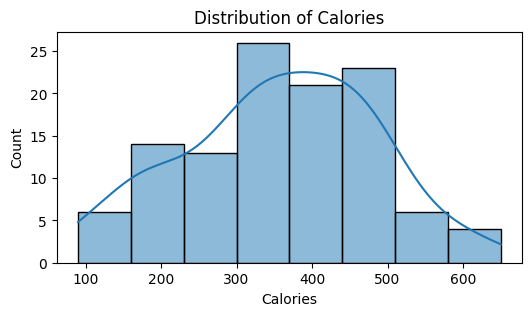

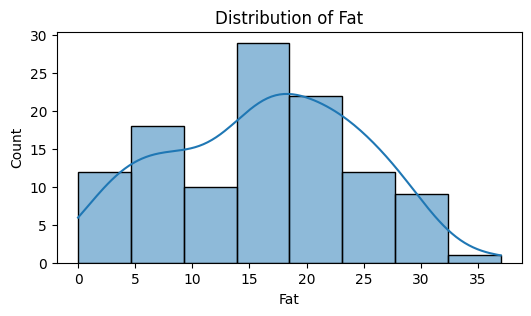

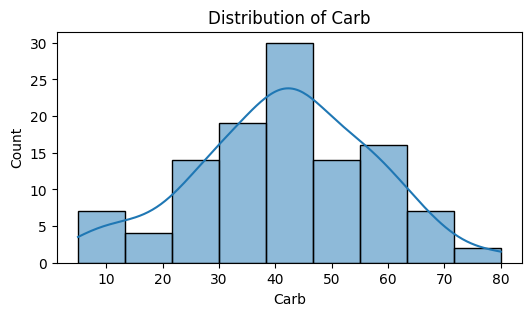

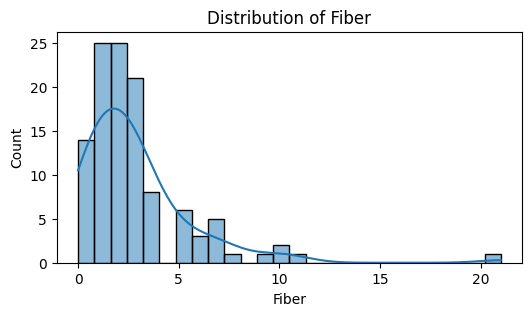

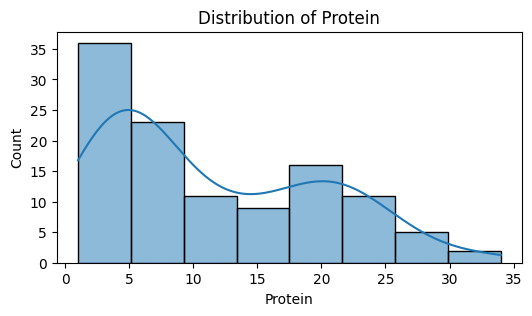

In [26]:
for col in data2.iloc[:, 1:].columns:
    plt.figure(figsize=(6, 3)) # Set size of histograms
    sns.histplot(data=data2, x=col, kde=True, element='bars').set_title('Distribution of ' + col) # Create histogram
    plt.show()

***Most Food Items have a calorie value between 300-500 gms.
Fat between 12-23gms.
Carb between 23-65 gms***

## 2.Correlation

In [14]:
data_main = data2.copy()
columns_to_remove = ['Item']

data_main = data_main.drop(columns=columns_to_remove)

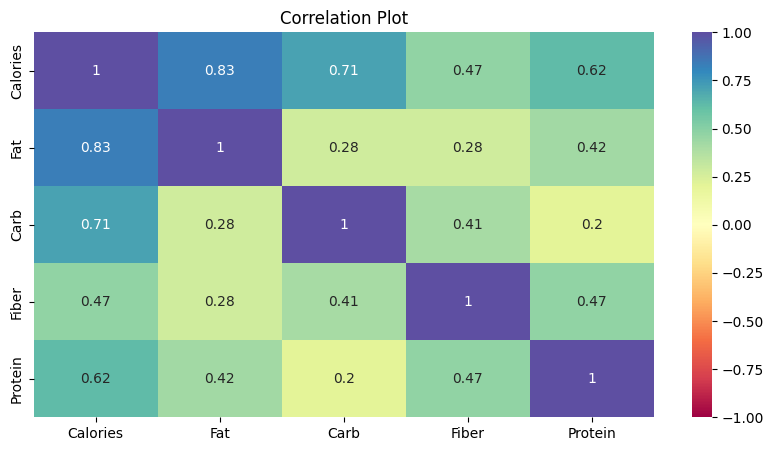

In [26]:
plt.figure(figsize=(10,5))
corrplot = sns.heatmap(data_main.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot")
plt.show()

***High positive correlation can be seen between Calories and Fat***

### 3.Finding Top 10 and bottom 10 beverages of nutrient category relevant to Analysis.

### 1. calories

In [28]:
# Sort the DataFrame by 'Calories' column in descending order
descending_calories = data2[['Item', 'Calories']].sort_values('Calories', ascending=False)

# Sort the DataFrame by 'Calories' column in ascending order
ascending_calories = data2[['Item', 'Calories']].sort_values('Calories')

# Select the top 15 entries for both ascending and descending order
top_15_descending = descending_calories.head(15)
top_15_ascending = ascending_calories.head(15)

print("Top 15 Descending Calories:")
print(top_15_descending)

print("\nBottom 15 Ascending Calories:")
print(top_15_ascending)

Top 15 Descending Calories:
                                                  Item  Calories
102   Lentils & Vegetable Protein Bowl with Brown Rice       650
61                         Green Goddess Avocado Salad       620
54                         Strawberries & Jam Sandwich       600
65              Roasted Turkey & Dill Havarti Sandwich       600
70                Za'atar Chicken & Lemon Tahini Salad       570
105                                Turkey Pesto Panini       560
69                    Turkey & Fire-Roasted Corn Salad       560
66                     Seared Steak & Cheddar Sandwich       530
75                                    PB&J Protein Box       520
97        Chicken Artichoke on Ancient Grain Flatbread       510
68         Smoked Mozzarella & Roasted Pepper Sandwich       500
93   Spicy Chorizo  Monterey Jack & Egg Breakfast S...       500
95                      Ancho Chipotle Chicken Panini        500
88            Sausage Cheddar & Egg Breakfast Sandwich       5

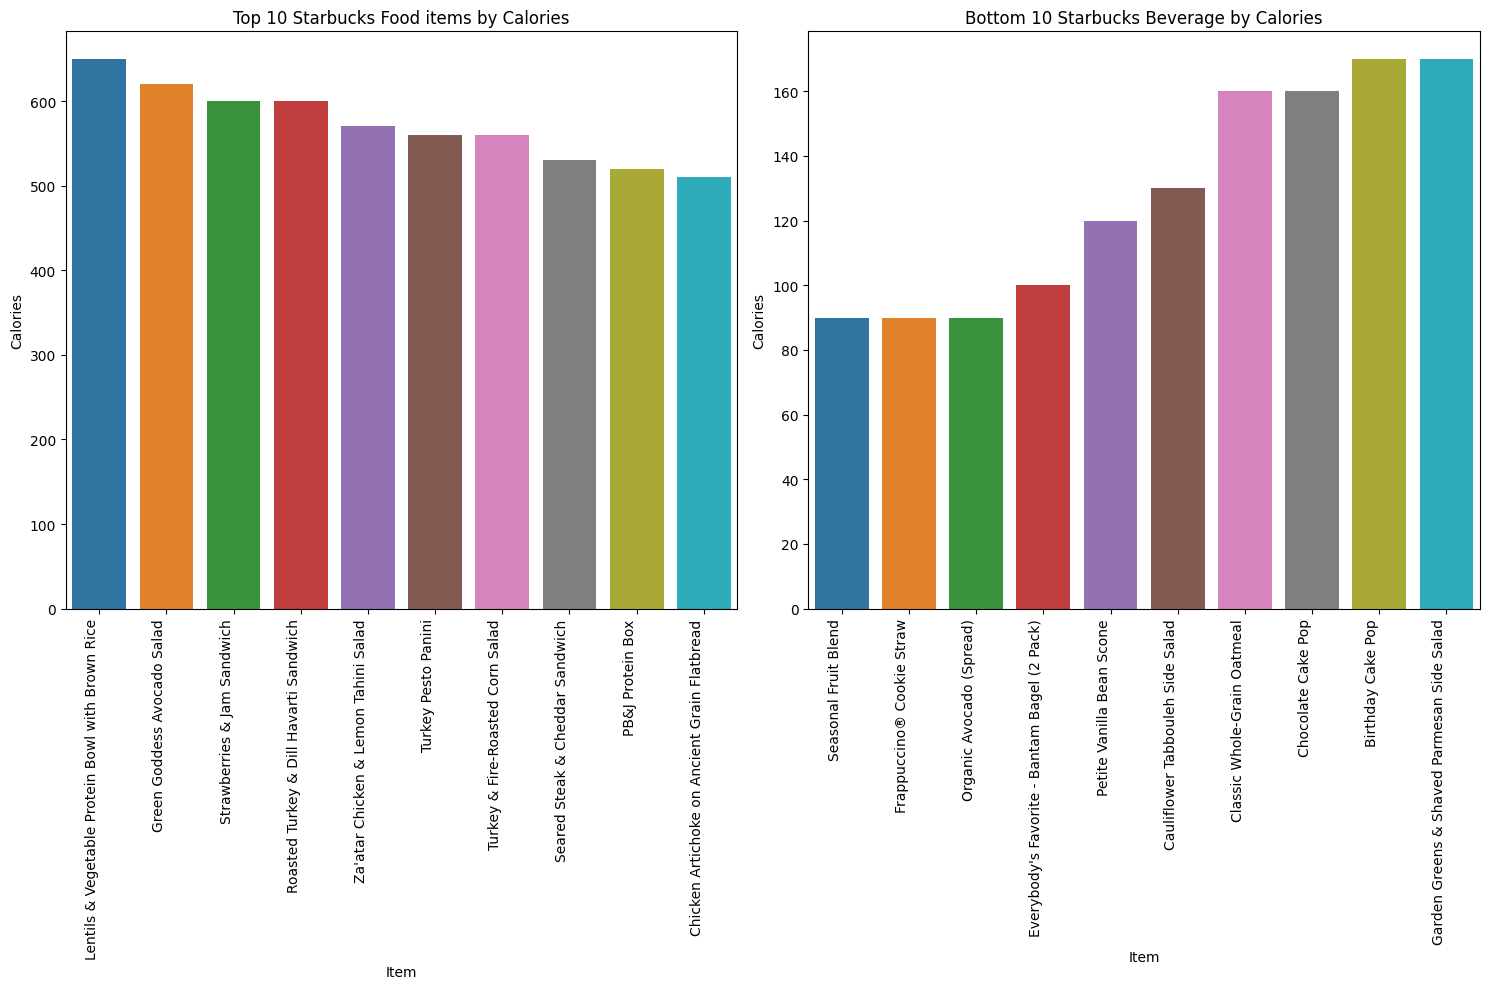

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot the top 10 items on the left subplot
sns.barplot(x="Item", y="Calories", data=top_10, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[0].set_title("Top 10 Starbucks Food items by Calories")

# Plot the bottom 10 items on the right subplot
sns.barplot(x="Item", y="Calories", data=bottom_10, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[1].set_title("Bottom 10 Starbucks Beverage by Calories")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### 2. fat

In [29]:
# Sort the DataFrame by 'Fat' column in descending order
descending_Fat = data2[['Item', 'Fat']].sort_values('Fat', ascending=False)

# Sort the DataFrame by 'Fat' column in ascending order
ascending_Fat = data2[['Item', 'Fat']].sort_values('Fat')

# Select the top 15 entries for both ascending and descending order
top_15_descending = descending_Fat.head(15)
top_15_ascending = ascending_Fat.head(15)

print("Top 15 Descending Fat:")
print(top_15_descending)

print("\nBottom 15 Ascending Fat:")
print(top_15_ascending)

Top 15 Descending Fat:
                                                  Item   Fat
61                         Green Goddess Avocado Salad  37.0
65              Roasted Turkey & Dill Havarti Sandwich  32.0
93   Spicy Chorizo  Monterey Jack & Egg Breakfast S...  30.0
59                         Farmers' Market Protein Box  29.0
102   Lentils & Vegetable Protein Bowl with Brown Rice  29.0
66                     Seared Steak & Cheddar Sandwich  29.0
69                    Turkey & Fire-Roasted Corn Salad  29.0
23                      Double Chocolate Chunk Brownie  28.0
68         Smoked Mozzarella & Roasted Pepper Sandwich  28.0
88            Sausage Cheddar & Egg Breakfast Sandwich  28.0
84          Double-Smoked Bacon Cheddar & Egg Sandwich  27.0
36                       Old-Fashioned Glazed Doughnut  27.0
72                          Cheese & Fruit Protein Box  27.0
97        Chicken Artichoke on Ancient Grain Flatbread  27.0
99                                  Egg Salad Sandwich  27.0



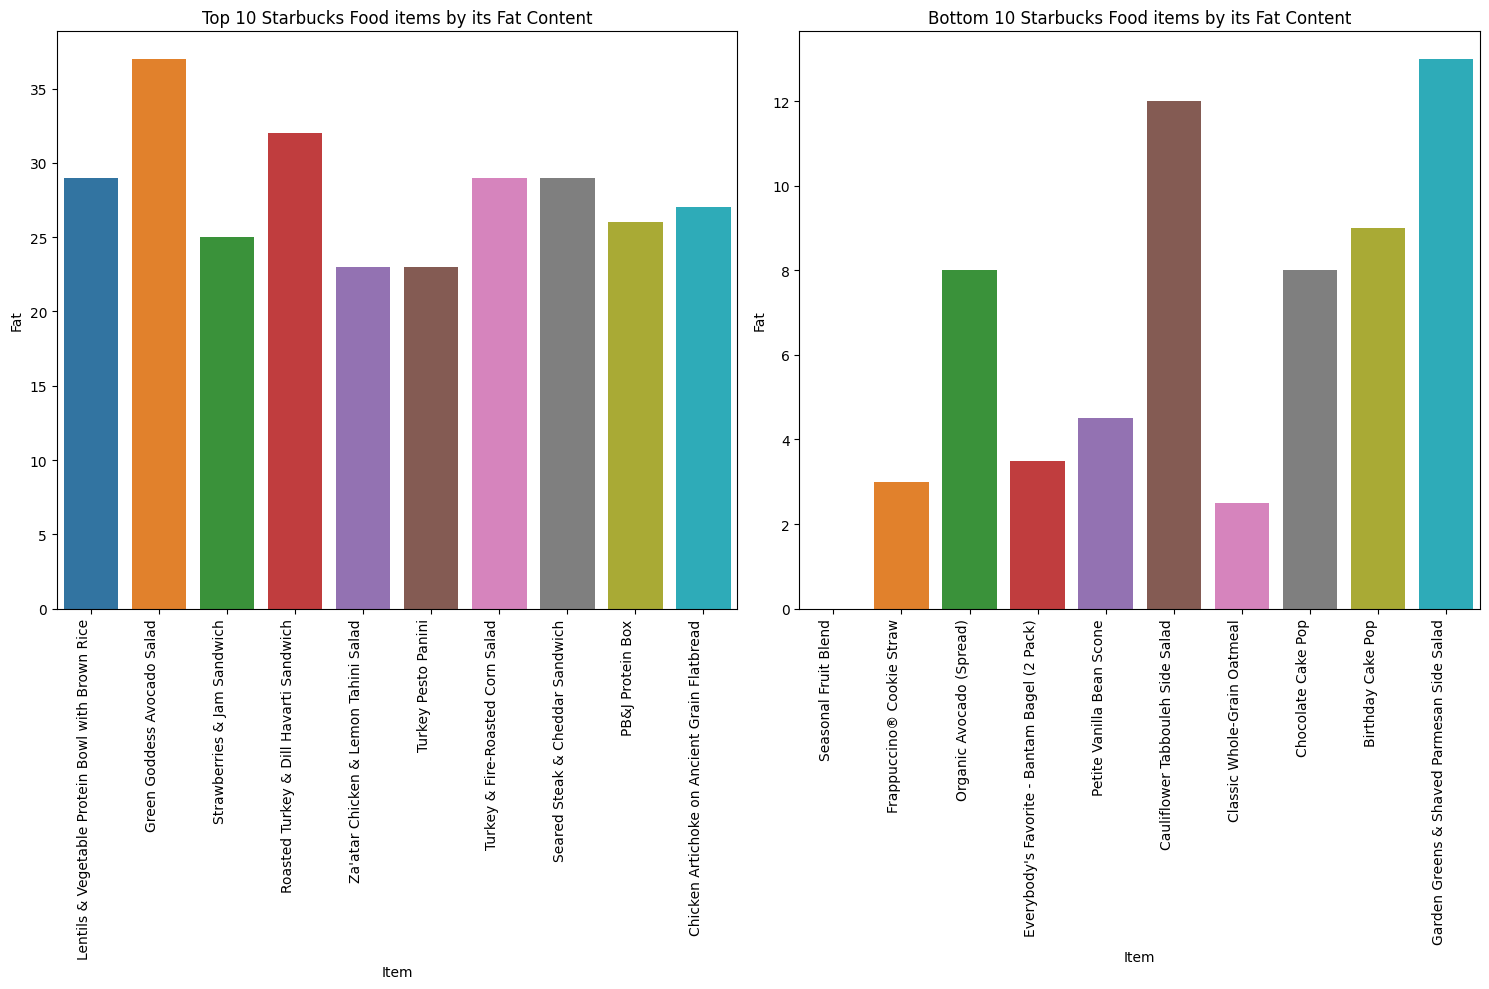

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot the top 10 items on the left subplot
sns.barplot(x="Item", y="Fat", data=top_10, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[0].set_title("Top 10 Starbucks Food items by its Fat Content")

# Plot the bottom 10 items on the right subplot
sns.barplot(x="Item", y="Fat", data=bottom_10, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[1].set_title("Bottom 10 Starbucks Food items by its Fat Content")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### 3. carb

In [30]:
# Sort the DataFrame by 'carb' column in descending order
descending_Carb = data2[['Item', 'Carb']].sort_values('Carb', ascending=False)

# Sort the DataFrame by 'carb' column in ascending order
ascending_Carb = data2[['Item', 'Carb']].sort_values('Carb')

# Select the top 15 entries for both ascending and descending order
top_15_descending = descending_Carb.head(15)
top_15_ascending = ascending_Carb.head(15)

print("Top 15 Descending Carb:")
print(top_15_descending)

print("\nBottom 15 Ascending Carb:")
print(top_15_ascending)

Top 15 Descending Carb:
                                                 Item  Carb
102  Lentils & Vegetable Protein Bowl with Brown Rice    80
54                        Strawberries & Jam Sandwich    80
1                                        8-Grain Roll    70
31                              Iced Lemon Pound Cake    68
70               Za'atar Chicken & Lemon Tahini Salad    67
44             Reduced-Fat Cinnamon Swirl Coffee Cake    67
20                             Cranberry Orange Scone    64
33                                   Multigrain Bagel    64
15                         Chocolate Marble Loaf Cake    64
41                                      Pumpkin Bread    63
61                        Green Goddess Avocado Salad    62
6                                     Blueberry Scone    61
42                          Raspberry Swirl Loaf Cake    61
12                             Chocolate Chunk Muffin    60
17                              Cinnamon Raisin Bagel    58

Bottom 15 Ascen

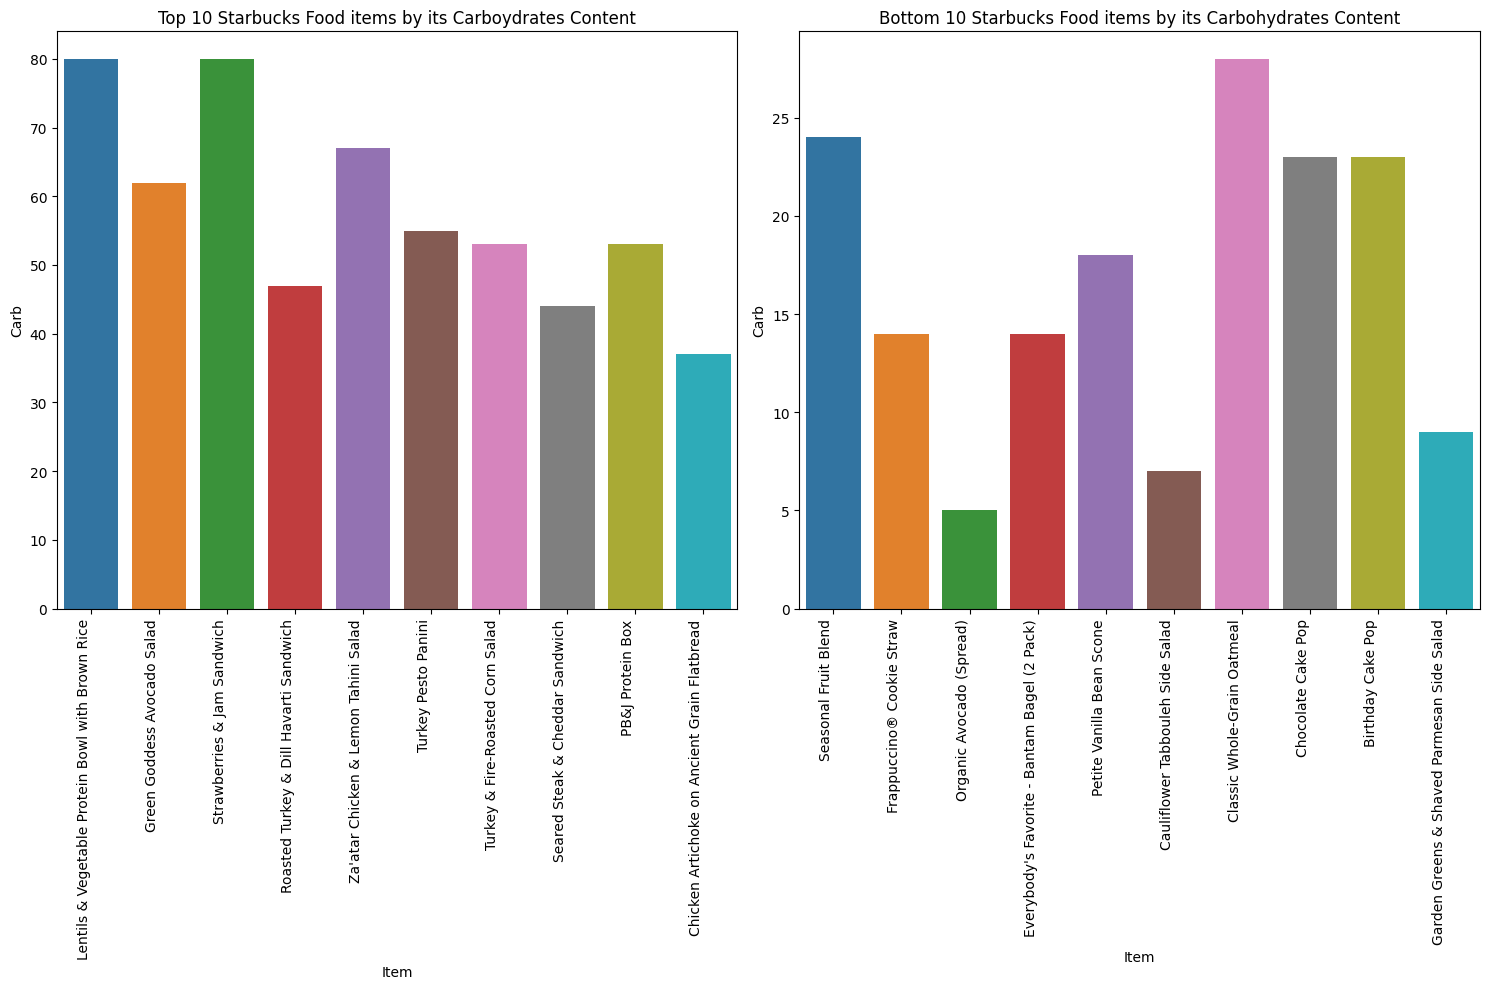

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot the top 10 items on the left subplot
sns.barplot(x="Item", y="Carb", data=top_10, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[0].set_title("Top 10 Starbucks Food items by its Carboydrates Content")

# Plot the bottom 10 items on the right subplot
sns.barplot(x="Item", y="Carb", data=bottom_10, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[1].set_title("Bottom 10 Starbucks Food items by its Carbohydrates Content")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

### 4.Protein 

In [31]:
# Sort the DataFrame by 'Protein' column in descending order
descending_Carb = data2[['Item', 'Protein']].sort_values('Protein', ascending=False)

# Sort the DataFrame by 'carb' column in ascending order
ascending_Carb = data2[['Item', 'Protein']].sort_values('Protein')

# Select the top 15 entries for both ascending and descending order
top_15_descending = descending_Carb.head(15)
top_15_ascending = ascending_Carb.head(15)

print("Top 15 Descending Protein:")
print(top_15_descending)

print("\nBottom 15 Ascending Protein:")
print(top_15_ascending)

Top 15 Descending Protein:
                                                  Item  Protein
105                                Turkey Pesto Panini       34
65              Roasted Turkey & Dill Havarti Sandwich       32
104                          Turkey & Havarti Sandwich       29
96   Chicken & Quinoa Protein Bowl with Black Beans...       27
70                Za'atar Chicken & Lemon Tahini Salad       27
93   Spicy Chorizo  Monterey Jack & Egg Breakfast S...       26
95                      Ancho Chipotle Chicken Panini        26
69                    Turkey & Fire-Roasted Corn Salad       24
76                           Smoked Turkey Protein Box       24
90     Slow-Roasted Ham Swiss & Egg Breakfast Sandwich       24
97        Chicken Artichoke on Ancient Grain Flatbread       24
74                           Eggs & Cheese Protein Box       23
102   Lentils & Vegetable Protein Bowl with Brown Rice       23
66                     Seared Steak & Cheddar Sandwich       23
100          

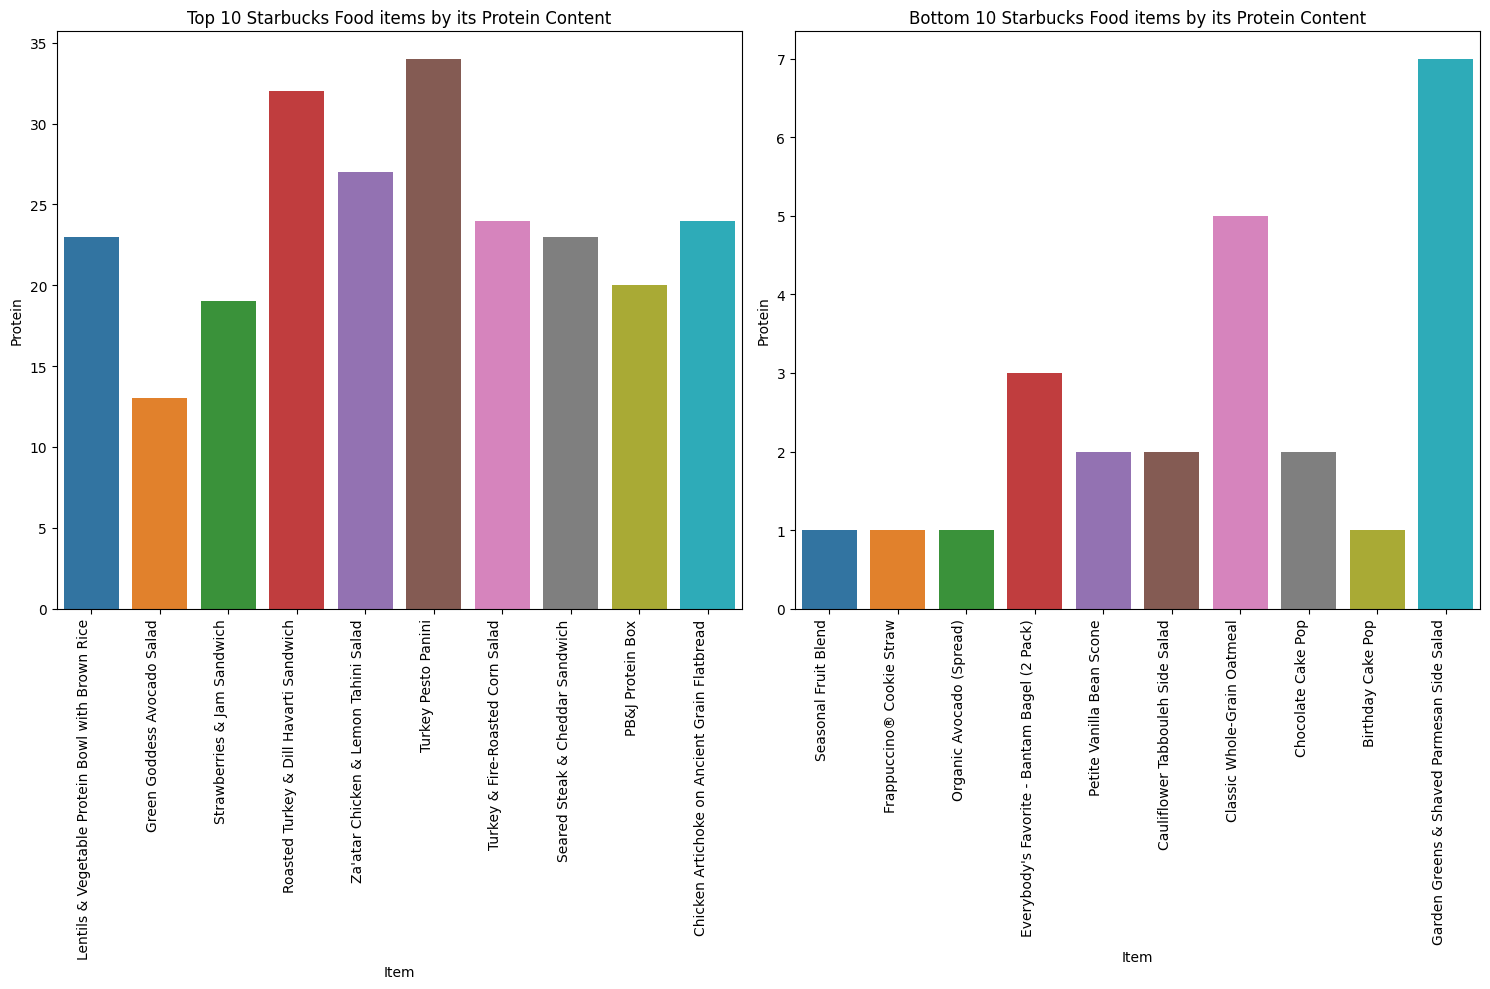

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot the top 10 items on the left subplot
sns.barplot(x="Item", y="Protein", data=top_10, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')
axes[0].set_title("Top 10 Starbucks Food items by its Protein Content")

# Plot the bottom 10 items on the right subplot
sns.barplot(x="Item", y="Protein", data=bottom_10, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')
axes[1].set_title("Bottom 10 Starbucks Food items by its Protein Content")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Conclusion
***We have visualised the food Items With hih and low values in terms of its Calories,Fat,Carbs and Protien Content.***